In [1]:
!pip install eli5

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import seaborn as sns
sns.set()

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered.csv')
test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)
(31912, 220)
(37863, 220)
(31912,)
(37863,)


In [4]:
# N_test = test_values[test_values[:,-2]==1]
# test_df = pd.DataFrame(N_test[:,:-1])

In [5]:
# for i in range(20):
#   sns.set()
#   plt.figure(figsize=(6,2))
#   plt.plot(test_df.iloc[i,:-1])
#   label = test_df.iloc[i,220]
#   print(label)
#   plt.title('Class: N, Number: 1')
#   plt.show()

In [6]:
from itertools import islice

def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = X_train
new_X_train = []
for i in range(len(X_train)):
  means = list(means_of_slices(a[i], 20))
  new_X_train.append(means)
X_train = np.array(new_X_train)
# X_train = []
# for i in new_X_train:
#   X_train.append(np.repeat(i,17))
# X_train = np.array(X_train)
# print(X_train.shape)

b = X_test
new_X_test = []
for i in range(len(X_test)):
  means = list(means_of_slices(b[i], 20))
  new_X_test.append(means)
X_test = np.array(new_X_test)
# X_test = []
# for i in new_X_test:
#   X_test.append(np.repeat(i,17))
# X_test = np.array(X_test)
# print(X_test.shape)

In [7]:
# using gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=100,random_state=48)
gbc_clf.fit(X_train, y_train)
print('Gradient Boosting Results')
y_pred_gbc = gbc_clf.predict(X_test)
print(gbc_clf.score(X_test,y_test))

# using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100,random_state=48)
ada_clf.fit(X_train, y_train)
print('Ada Boosting Results')
y_pred_ada = ada_clf.predict(X_test)
print(ada_clf.score(X_test,y_test))

# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(max_depth=10, random_state=48,n_estimators=10)
rfc_clf.fit(X_train, y_train)
print('Random Forest Results')
y_pred_rfc = rfc_clf.predict(X_test)
print(rfc_clf.score(X_test, y_test))

# using naive bayes
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print('Naive Bayes Results')
y_pred_NB = NB_clf.predict(X_test)
print(NB_clf.score(X_test, y_test))

# using NN Multi Layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
NNMLP_clf = MLPClassifier(random_state=48, max_iter=100)
NNMLP_clf.fit(X_train, y_train)
print('NNMLP Results')
y_pred_NNMLP = NNMLP_clf.predict(X_test)
print(NNMLP_clf.score(X_test, y_test))

#support vector classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(X_train, y_train)
print('Support Vector Results')
y_pred_svc = svc_clf.predict(X_test)
print(svc_clf.score(X_test,y_test))

Gradient Boosting Results
0.8531283839104139
Ada Boosting Results
0.33655547632253124
Random Forest Results
0.8667300530861263
Naive Bayes Results
0.35612603333069226


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NNMLP Results
0.8925071969997095
Support Vector Results
0.8899189182051079


In [8]:
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

perm_gbc = PermutationImportance(gbc_clf).fit(X_test, y_test)
print('GBC Results')
eli5.explain_weights(perm_gbc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


GBC Results


Weight,Feature
0.1488 ± 0.0039,x6
0.1386 ± 0.0020,x7
0.1080 ± 0.0015,x5
0.0680 ± 0.0019,x10
0.0664 ± 0.0025,x4
0.0645 ± 0.0023,x3
0.0566 ± 0.0028,x2
0.0371 ± 0.0011,x1
0.0307 ± 0.0016,x0
0.0282 ± 0.0009,x8


In [9]:
perm_ada = PermutationImportance(ada_clf).fit(X_test, y_test)
print('ADA Results')
eli5.show_weights(perm_ada)

ADA Results


Weight,Feature
0.0755 ± 0.0026,x5
0.0502 ± 0.0015,x8
0.0467 ± 0.0028,x4
0.0392 ± 0.0048,x10
0.0380 ± 0.0017,x6
0.0379 ± 0.0022,x7
0.0280 ± 0.0018,x9
0.0071 ± 0.0014,x1
0.0066 ± 0.0011,x3
0.0059 ± 0.0006,x2


In [10]:
perm_rfc =PermutationImportance(rfc_clf).fit(X_test, y_test)
print('RFC Results')
eli5.show_weights(perm_rfc)

RFC Results


Weight,Feature
0.1770 ± 0.0007,x7
0.1409 ± 0.0018,x5
0.0860 ± 0.0026,x6
0.0713 ± 0.0020,x2
0.0547 ± 0.0017,x1
0.0493 ± 0.0013,x3
0.0415 ± 0.0020,x10
0.0386 ± 0.0018,x4
0.0350 ± 0.0026,x9
0.0336 ± 0.0004,x8


In [11]:
perm_nb =PermutationImportance(NB_clf).fit(X_test, y_test)
print('NB Results')
eli5.show_weights(perm_nb)

NB Results


Weight,Feature
0.0527 ± 0.0014,x4
0.0445 ± 0.0011,x7
0.0170 ± 0.0023,x6
0.0083 ± 0.0013,x1
0.0047 ± 0.0021,x0
-0.0091 ± 0.0016,x5
-0.0253 ± 0.0019,x3
-0.0284 ± 0.0015,x2
-0.0295 ± 0.0013,x10
-0.0480 ± 0.0024,x8


In [12]:
perm_nnmlp =PermutationImportance(NNMLP_clf).fit(X_test, y_test)
print('NNMLP Results')
eli5.show_weights(perm_nnmlp)

NNMLP Results


Weight,Feature
0.2486 ± 0.0023,x6
0.2399 ± 0.0021,x7
0.2006 ± 0.0032,x5
0.1545 ± 0.0015,x10
0.1451 ± 0.0010,x2
0.1369 ± 0.0027,x3
0.1306 ± 0.0020,x9
0.1243 ± 0.0022,x1
0.1232 ± 0.0025,x0
0.1180 ± 0.0017,x4


In [13]:
perm_svc =PermutationImportance(svc_clf).fit(X_test, y_test)
print('SVC Results')
eli5.show_weights(perm_svc)

SVC Results


Weight,Feature
0.1820 ± 0.0023,x7
0.1740 ± 0.0032,x6
0.1584 ± 0.0028,x2
0.1538 ± 0.0013,x5
0.1394 ± 0.0008,x3
0.1328 ± 0.0018,x1
0.1278 ± 0.0020,x0
0.1258 ± 0.0010,x9
0.1149 ± 0.0012,x10
0.0753 ± 0.0032,x8


In [49]:
from sklearn import metrics

metrics_gbc = metrics.classification_report(y_test, y_pred_gbc, digits=3)
metrics_ada = metrics.classification_report(y_test, y_pred_ada, digits=3)
metrics_rfc = metrics.classification_report(y_test, y_pred_rfc, digits=3)
metrics_NB = metrics.classification_report(y_test, y_pred_NB, digits=3)
metrics_NNMLP = metrics.classification_report(y_test, y_pred_NNMLP, digits=3)
metrics_svc = metrics.classification_report(y_test, y_pred_svc, digits=3)

print(metrics_gbc, 'gbc metrics')
print(metrics_ada, 'ada metrics')
print(metrics_rfc, 'rfc metrics')
print(metrics_NB, 'NB metrics')
print(metrics_NNMLP, 'NNMLP metrics')
print(metrics_svc, 'svc metrics')

              precision    recall  f1-score   support

         1.0      0.990     0.828     0.902     28703
         2.0      0.859     0.983     0.917      1660
         3.0      0.820     0.939     0.876      2500
         4.0      0.609     0.848     0.709      1199
         5.0      0.252     0.818     0.385       773
         6.0      0.122     0.855     0.214       193
         7.0      0.323     0.888     0.473       428
         8.0      0.988     0.983     0.985      2407

    accuracy                          0.853     37863
   macro avg      0.620     0.893     0.683     37863
weighted avg      0.934     0.853     0.881     37863
 gbc metrics
              precision    recall  f1-score   support

         1.0      0.945     0.276     0.428     28703
         2.0      0.273     0.414     0.329      1660
         3.0      0.166     0.665     0.266      2500
         4.0      0.322     0.220     0.261      1199
         5.0      0.062     0.640     0.113       773
         6.0

Text(0.5, 1.0, 'SVC confusion matrix')

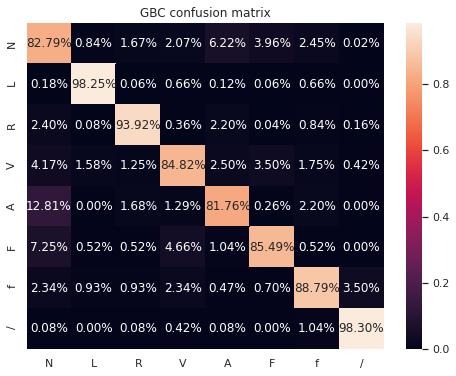

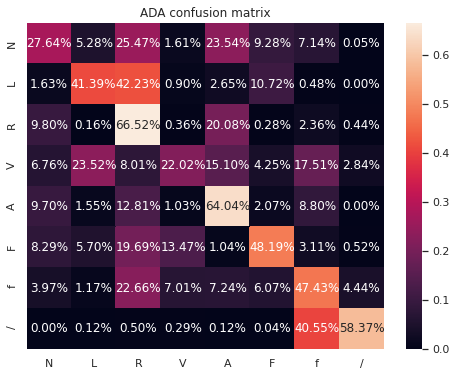

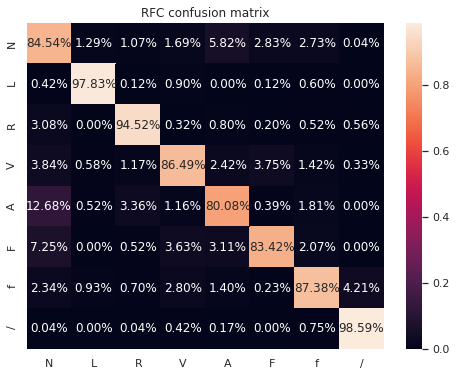

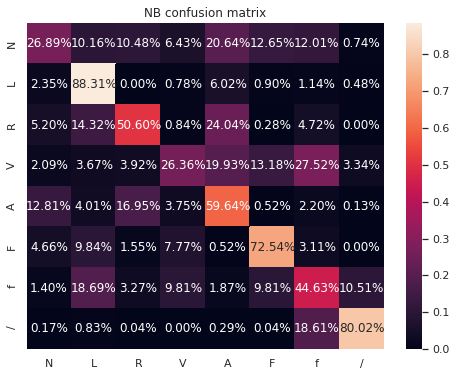

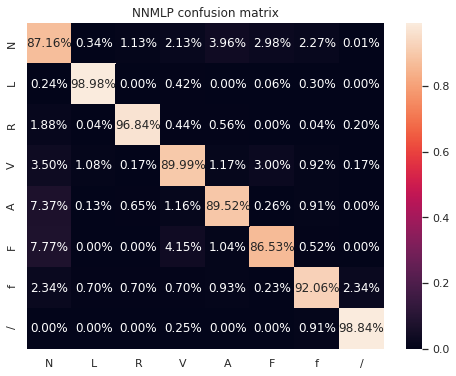

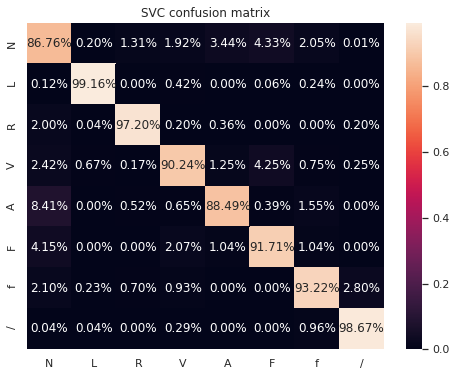

In [50]:
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

categories = ['N','L','R','V','A','F','f','/']

gbc_cf_m = confusion_matrix(y_test,y_pred_gbc)
gbc_cf_m = gbc_cf_m.astype('float')/ gbc_cf_m.sum(axis=1)[:,np.newaxis]
gbc_pr_s = precision_score(y_test,y_pred_gbc,average='weighted')

ada_cf_m = confusion_matrix(y_test,y_pred_ada)
ada_cf_m = ada_cf_m.astype('float')/ ada_cf_m.sum(axis=1)[:,np.newaxis]
ada_pr_s = precision_score(y_test,y_pred_ada,average='weighted')

rfc_cf_m = confusion_matrix(y_test,y_pred_rfc)
rfc_cf_m = rfc_cf_m.astype('float')/ rfc_cf_m.sum(axis=1)[:,np.newaxis]
rfc_pr_s = precision_score(y_test,y_pred_rfc,average='weighted')

NB_cf_m = confusion_matrix(y_test,y_pred_NB)
NB_cf_m = NB_cf_m.astype('float')/ NB_cf_m.sum(axis=1)[:,np.newaxis]
NB_pr_s = precision_score(y_test,y_pred_NB,average='weighted')

NNMLP_cf_m = confusion_matrix(y_test,y_pred_NNMLP)
NNMLP_cf_m = NNMLP_cf_m.astype('float')/ NNMLP_cf_m.sum(axis=1)[:,np.newaxis]
NNMLP_pr_s = precision_score(y_test,y_pred_NNMLP,average='weighted')

svc_cf_m = confusion_matrix(y_test,y_pred_svc)
svc_cf_m = svc_cf_m.astype('float')/ svc_cf_m.sum(axis=1)[:,np.newaxis]
svc_pr_s = precision_score(y_test,y_pred_svc,average='weighted')

plt.figure(figsize=(8,6))
sns.heatmap(gbc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('GBC confusion matrix')
# plt.savefig('gbc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(ada_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('ADA confusion matrix')
# plt.savefig('ada_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(rfc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('RFC confusion matrix')
# plt.savefig('rfc_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(NB_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NB confusion matrix')
# plt.savefig('NB_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(NNMLP_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('NNMLP confusion matrix')
# plt.savefig('NNMLP_cfm.jpeg')

plt.figure(figsize=(8,6))
sns.heatmap(svc_cf_m,annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories)
plt.title('SVC confusion matrix')
# plt.savefig('SVC_cfm.jpeg')

Computing partial dependence plots...


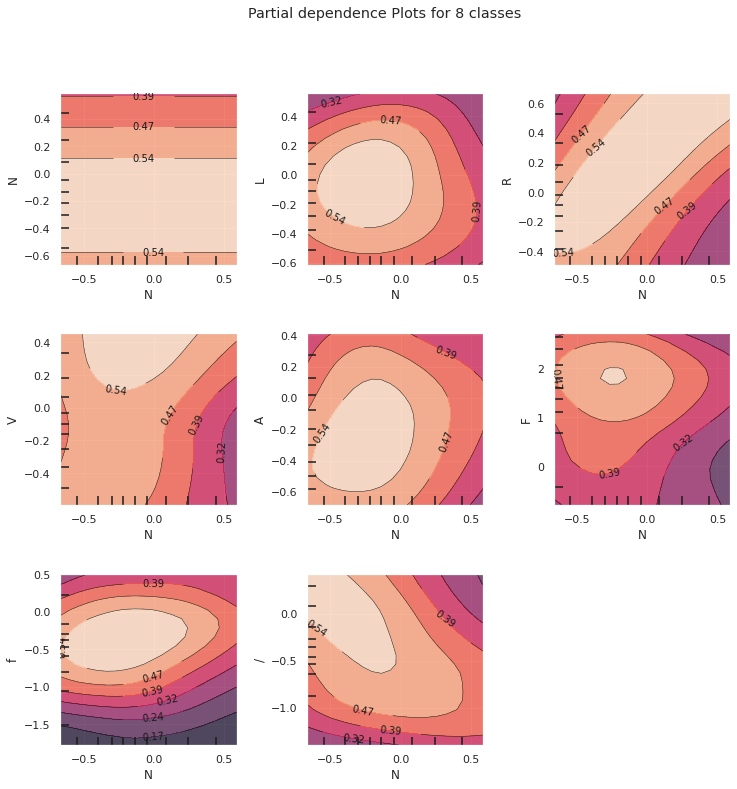

In [51]:
from sklearn.inspection import plot_partial_dependence

features=np.array([(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7)])
feature_names=np.array(['N','L','R','V','A','F','f','/'])

print('Computing partial dependence plots...')
plot_partial_dependence(NNMLP_clf, 
                        features=features,
                        feature_names=feature_names,
                        X=X_test,
                        target=1,
                        grid_resolution=20)

fig = plt.gcf()
fig.suptitle('Partial dependence Plots for 8 classes')
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.set_size_inches(12,12)

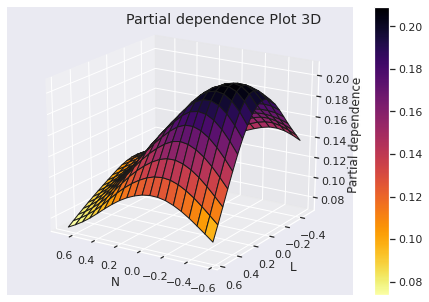

In [53]:
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

features = [0,1]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('L')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)
plt.show()

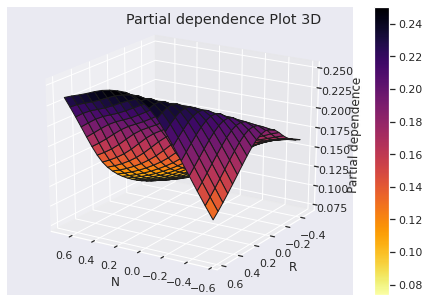

In [54]:
fig = plt.figure()

features = [0,2]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('R')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

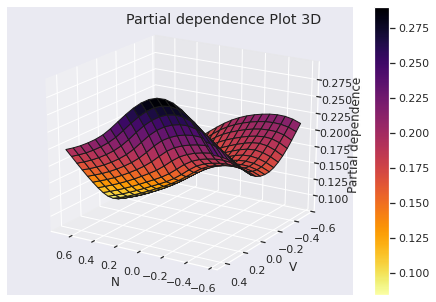

In [55]:
fig = plt.figure()

features = [0,3]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('V')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

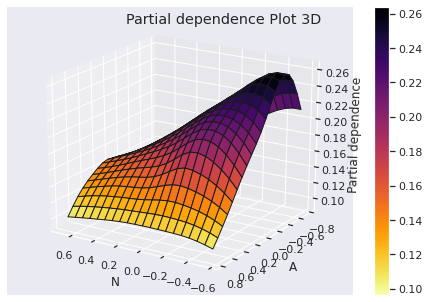

In [56]:
fig = plt.figure()

features = [0,4]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('A')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

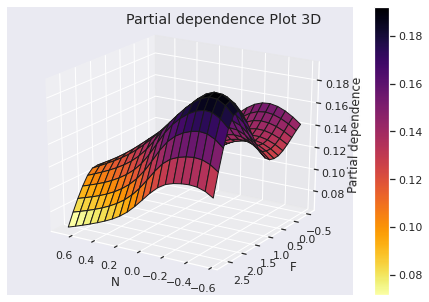

In [57]:
fig = plt.figure()

features = [0,5]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('F')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

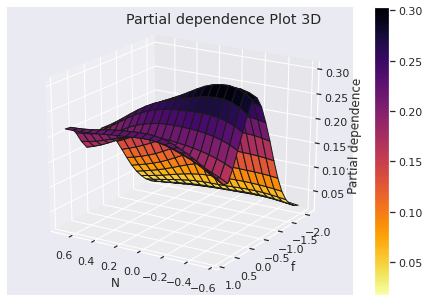

In [58]:
fig = plt.figure()

features = [0,6]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('f')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

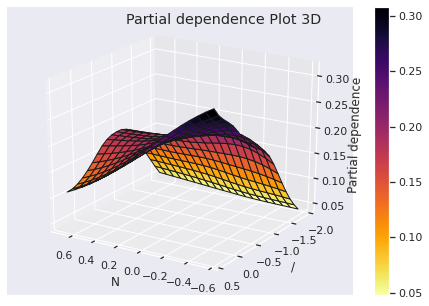

In [59]:
fig = plt.figure()

features = [0,7]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('/')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

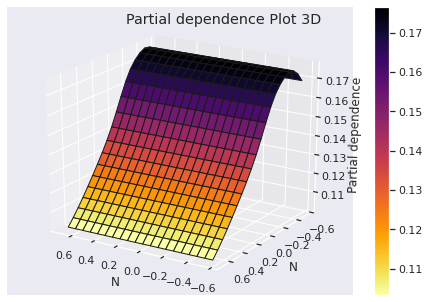

In [60]:
fig = plt.figure()

features = [0,0]
pdp, axes = partial_dependence(NNMLP_clf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.inferno_r, edgecolor='k')
ax.set_xlabel('N')
ax.set_ylabel('N')
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence Plot 3D')
plt.subplots_adjust(top=0.9)

plt.show()

In [61]:
# !pip install shap

In [62]:
# !pip install alibi

In [63]:
# import shap
# from alibi.explainers import KernelShap
# from sklearn import svm
# from sklearn.datasets import load_wine
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

In [64]:
# np.random.seed(0)
# classifier = SVC(
#     kernel = 'rbf',
#     C=1,
#     gamma = 'auto',
#     decision_function_shape='ovr',  # n_cls trained with data from one class as postive and remainder of data as neg
#     random_state = 42,
# )
# classifier.fit(X_train, y_train)

In [65]:
# feature_names = ['N','L','R','V','A','F','f','/']
# target_names = ['N','L','R','V','A','F','f','/']

In [66]:
# y_pred = classifier.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)

# title = 'Confusion matrix for SVC classifier'
# disp = plot_confusion_matrix(classifier,
#                              X_test,
#                              y_test,
#                              display_labels=target_names,
#                              cmap=plt.cm.Blues,
#                              normalize=None,
#                             )
# disp.ax_.set_title(title)

In [67]:
# pred_fcn = classifier.decision_function

# np.random.seed(0)
# svm_explainer = KernelShap(pred_fcn)
# svm_explainer.fit(X_train,summarise_background=True)

In [68]:
# print(X_test.shape)

In [69]:
# # expected_values attribute stores average scores across training set for every binary SVM
# mean_scores_train = pred_fcn(X_train).mean(axis=0)
# # are stored in the expected value attibute of the explainer ...
# print(mean_scores_train - svm_explainer.expected_value)

In [70]:
# svm_explanation = svm_explainer.explain(X_test[:30,:], l1_reg=False, summarise_background=True, nsamples=30)

In [71]:
# print("Output type:", type(svm_explanation.shap_values))
# print("Output size:", len(svm_explanation.shap_values))
# print("Class output size:", svm_explanation.shap_values[0].shape)

In [72]:
# idx = 11
# instance = X_test[idx][None, :]
# pred = classifier.predict(instance)
# scores =  classifier.decision_function(instance)
# class_idx = 0
# print("The predicted class for the X_test[{}] is {}.".format(idx, *pred))
# print("OVR decision function values are {}.".format(*scores))

In [73]:
# shap.initjs()
# shap.force_plot(
#     svm_explainer.expected_value[class_idx],
#     svm_explanation.shap_values[class_idx][idx, :] ,
#     instance,
#     feature_names,
# )

In [74]:
# def class_labels(classifier, instance, class_names=None):
#     """
#     Creates a set of legend labels based on the decision
#     scores of a classifier and, optionally, the class names.
#     """

#     decision_scores = classifier.decision_function(instance)

#     if not class_names:
#         class_names = [f'Class {i}' for i in range(decision_scores.shape[1])]

#     for i, score in enumerate(np.nditer(decision_scores)):
#         class_names[i] = class_names[i] + ' ({})'.format(round(score.item(),3))

#     return class_names

In [75]:
# legend_labels = class_labels(classifier, instance)
# legend_labels = feature_names

In [76]:
# shap.initjs()
# r = shap.multioutput_decision_plot(svm_explainer.expected_value.tolist(),
#                                    svm_explanation.shap_values,
#                                    idx,
#                                   #feature_names=feature_names,
#                                    feature_order='importance',
#                                    highlight=[class_idx],
#                                    legend_labels=legend_labels,
#                                    return_objects=True,
#                                    legend_location='lower right')

In [77]:
# shap.initjs()
# r = shap.multioutput_decision_plot(svm_explainer.expected_value.tolist(),
#                                    svm_explanation.shap_values,
#                                    idx,
#                                   #  feature_names=feature_names,
#                                    feature_order='importance',
#                                    highlight=[class_idx],
#                                    legend_labels=legend_labels,
#                                    feature_display_range=slice(None, -187, -1),
#                                    return_objects=True,
#                                    legend_location='lower right')

In [78]:
# idx =  0
# instance = X_test[idx][None, :]
# pred = classifier.predict(instance)

# instance_shap = np.array(svm_explanation.shap_values)[:, idx, :]
# feature_order = np.argsort(np.sum(np.abs(instance_shap),axis=0))[::]

In [79]:
# print(instance_shap.shape)
# print(feature_order.shape)
# # print(feature_order)

In [80]:
# feat_importance = [feature_names[i] for i in feature_order]

# print(feat_importance)

In [81]:
# shap.multioutput_decision_plot(svm_explainer.expected_value.tolist(),
#                                svm_explanation.shap_values,
#                                idx,
#                               #  feature_names=feature_names,
#                                feature_order=r.feature_idx,
#                                highlight=[int(pred.item())],
#                                legend_labels=legend_labels,
#                                legend_location='lower right',
#                                xlim=r.xlim,
#                                return_objects=True)

In [82]:
# class_idx = 0 # we explain the predicted label
# shap.initjs()
# shap.force_plot(
#     svm_explainer.expected_value[class_idx],
#     svm_explanation.shap_values[class_idx],
#     X_test,
#     feature_names=feature_names,
# )

In [83]:
# shap.summary_plot(svm_explanation.shap_values, X_test,class_names=feature_names)

In [84]:
# y_pred_gbc = gbc_clf.predict(X_test)
# y_pred_ada = ada_clf.predict(X_test)
# y_pred_rfc = rfc_clf.predict(X_test)
# y_pred_NB = NB_clf.predict(X_test)
# y_pred_NNMLP = NNMLP_clf.predict(X_test)
# y_pred_svc = svc_clf.predict(X_test)

In [85]:
# y_test = test_values[:,-2]

In [86]:
# print(y_pred_gbc.shape)
# print(y_test.shape)